<a href="https://colab.research.google.com/github/rautvaishnavi/OIBSIP/blob/main/Task_5_OasisInfobyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name : Vaishnavi Raut

# **Task 5 : Sales Prediction** 📊📝

**Steps performed:**

1. Import the Dependencies
2. Loading the Dataset
3. Preprocessing the Dataset
4. Plotting Graph of each Product
5. Plotting the Correlation Heatmap
6. Splitting the Training Data and Testing Data
7. Training the Linear Model
8. Plotting for checking the Prediction of our Model

1. **Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

2. **Loading the Dataset**

In [ ]:
sales_data = pd.read_csv('/content/Advertising.csv')

3. Preprocessing the Dataset

In [ ]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
sales_data.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#Let's check for some Missing values
sales_data.isnull().sum()

Id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
sales_data.describe()

,Id,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


As we can observe from the above statistics that :

1. Avg expense spent on TV is highest

2. Avg expense spent on Radio is lowest

3. Max sell is 27 and min is 1.6

4. **Plotting the Graph related to each Product**

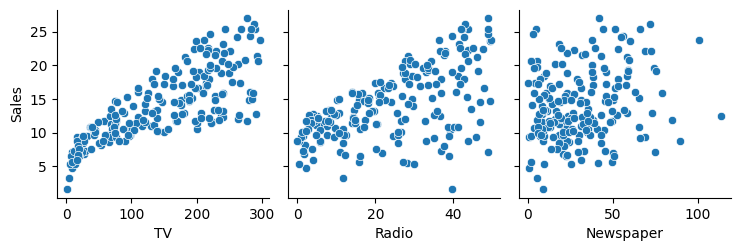

In [ ]:
sns.pairplot(sales_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

Here we can see that as the expense on the TV ad increases the TV sales also increases , but for Radio and Newspaper it's not predictable.

<Axes: ylabel='Frequency'>

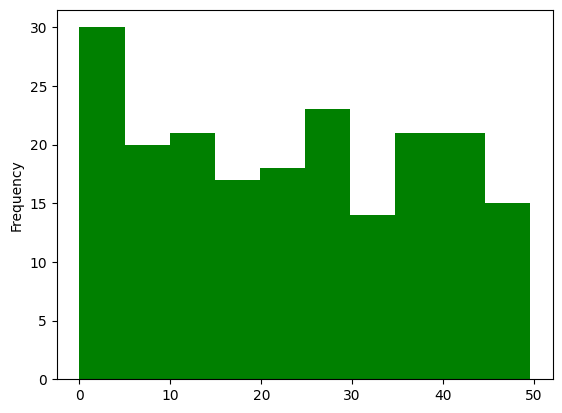

In [ ]:
sales_data['Radio'].plot.hist(bins=10, color='green', xlabel='Radio')

<Axes: ylabel='Frequency'>

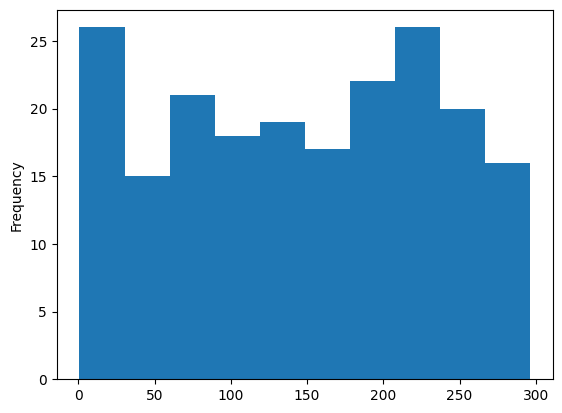

In [ ]:
sales_data['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

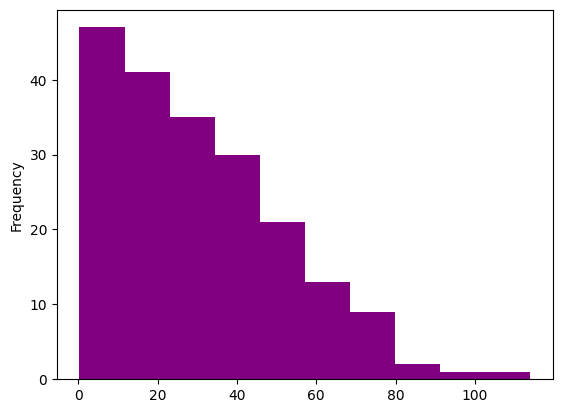

In [ ]:
sales_data['Newspaper'].plot.hist(bins=10, color='purple', xlabel='Newspaper')

As we can see here the sales is the result of less investment in Ad of Newspaper

**5. Plotting the Correlation using Heat**map

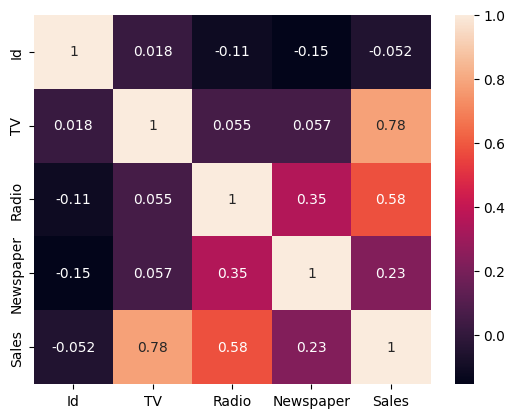

In [ ]:
sns.heatmap(sales_data.corr(),annot=True)
plt.show()

Here we can observe that sales is mostly and only correlated with TV Hence we train our model in given below way

6. **Splitting the Training Data and Testing Data**

In [ ]:
X = sales_data[['TV']]
Y = sales_data[['Sales']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X_train)

        TV
137  273.7
163  163.5
111  241.7
123  123.1
109  255.4
..     ...
43   206.9
22    13.2
72    26.8
15   195.4
168  215.4

[160 rows x 1 columns]


In [ ]:
print(Y_train)

     Sales
137   20.8
163   18.0
111   21.8
123   15.2
109   19.8
..     ...
43    12.9
22     5.6
72     8.8
15    22.4
168   17.1

[160 rows x 1 columns]


7. **Training the Linear Model**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
result = model.predict(X_test)
print(result)

[[15.78344456]
 [10.27007924]
 [ 9.51467999]
 [18.7420916 ]
 [15.31656586]
 [16.70146447]
 [10.03401697]
 [20.34731499]
 [10.5061415 ]
 [21.81614685]
 [ 7.81503169]
 [17.98669235]
 [11.68120699]
 [ 6.9756992 ]
 [18.23324627]
 [ 7.46880704]
 [ 7.88322746]
 [14.51395416]
 [17.56178028]
 [17.27325973]
 [18.54275013]
 [20.35780665]
 [ 9.58287576]
 [ 8.50223517]
 [18.86799147]
 [15.40049911]
 [15.75196959]
 [10.18614599]
 [18.48504602]
 [18.31717952]
 [21.08173092]
 [13.44380523]
 [17.04768912]
 [13.71134246]
 [ 6.84979933]
 [12.32644385]
 [18.12308388]
 [19.59716157]
 [20.47846069]
 [16.14540669]]


8. **Plotting for checking the Prediction of our Model**

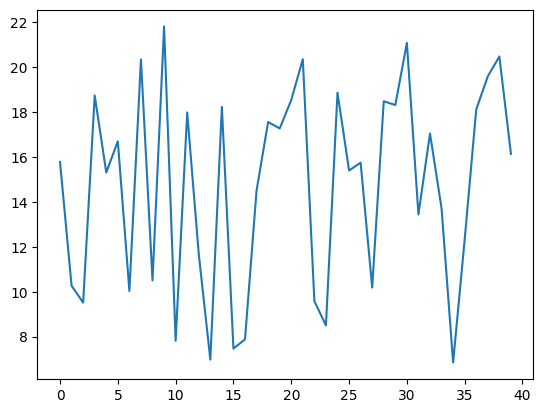

In [ ]:
plt.plot(result)

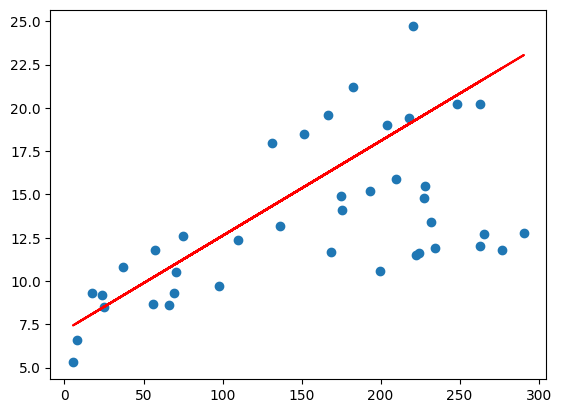

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 7.14382225 + 0.05473199 * X_test, 'r')
plt.show()